## Angler Machine Learning


<b>Goal:</b> Inspect methods for fishing success including geography, waterbody type, catch method, and bait used.
<b>Tentative hypothesis:</b> C


Data source: [data.michigan.gov](https://data.michigan.gov/dataset/Master-Angler-Database/mrpa-7cvr)

In [228]:
# Import packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [229]:
# Import data

df = pd.read_csv('Master_Angler_Database-3.csv')

In [230]:
# Quick inspection of dataset

df.head()

,Category,Species,County,Waterbody,Date/Time,Year,Weight (lbs),Length (in),Angler,Angler's City,Method,Bait
0,Catch and Keep,COHO SALMON Michigan,NaN,Lake Michigan,07/11/2014 10:00:00 AM,2014,13.25,31.0,DAVID REVORE,MARSHALL,Trolling,Meat Rig
1,Catch and Keep,LAKE TROUT,NaN,Lake Michigan,06/26/2014 07:30:00 AM,2014,32.06,45.0,FRANK JOSEPH BAKER,MANISTEE,Trolling,Spoon
2,Catch and Keep,LAKE TROUT,NaN,Lake Michigan,07/04/2014 09:00:00 AM,2014,20.56,34.5,JASON HENRY PHELPS,SPARTA,Trolling,Moo Moo
3,Catch and Keep,LAKE TROUT,NaN,Lake Michigan,06/21/2014 10:15:00 AM,2014,20.19,38.0,JASON HENRY PHELPS,SPARTA,Trolling,Moo Moo
4,Catch and Keep,RAINBOW TROUT,NaN,Lake Michigan,06/21/2014 09:30:00 AM,2014,14.31,32.0,TERESA MARIE PHELPS,SPARTA,Trolling,Red Devil


In [232]:
# Inspect dataframe shape

print('Dataframe has {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

Dataframe has 16094 rows and 12 columns.


In [233]:
# Convert to datetime format 
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [234]:
# Inspect data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16094 entries, 0 to 16093
Data columns (total 12 columns):
Category         16094 non-null object
Species          16094 non-null object
County           15982 non-null object
Waterbody        16094 non-null object
Date/Time        16094 non-null datetime64[ns]
Year             16094 non-null int64
Weight (lbs)     6179 non-null float64
Length (in)      15813 non-null float64
Angler           16094 non-null object
Angler's City    16094 non-null object
Method           16050 non-null object
Bait             15718 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 1.5+ MB


In [235]:
# Look at null values per feature 

for i in range(0,12):
    print(df[df.columns[i]].notnull().value_counts())

True    16094
Name: Category, dtype: int64
True    16094
Name: Species, dtype: int64
True     15982
False      112
Name: County, dtype: int64
True    16094
Name: Waterbody, dtype: int64
True    16094
Name: Date/Time, dtype: int64
True    16094
Name: Year, dtype: int64
False    9915
True     6179
Name: Weight (lbs), dtype: int64
True     15813
False      281
Name: Length (in), dtype: int64
True    16094
Name: Angler, dtype: int64
True    16094
Name: Angler's City, dtype: int64
True     16050
False       44
Name: Method, dtype: int64
True     15718
False      376
Name: Bait, dtype: int64


In [236]:
# Inspect number of fish caught per waterbody

fish_by_lake = df.groupby('Waterbody').Waterbody.count()
fish_by_lake = pd.DataFrame(fish_by_lake)
fish_by_lake.columns = ['Counts']
fish_by_lake.reset_index(inplace = True)
fish_by_lake.sort_values('Counts', ascending= False, inplace = True)
fish_by_lake.head()

,Waterbody,Counts
583,Lake St. Clair,1229
557,Lake Michigan,942
895,Saginaw Bay,640
359,Grand River,551
517,Lake Erie,427


In [237]:
fish_by_lake_top_twenty = fish_by_lake.head(20)

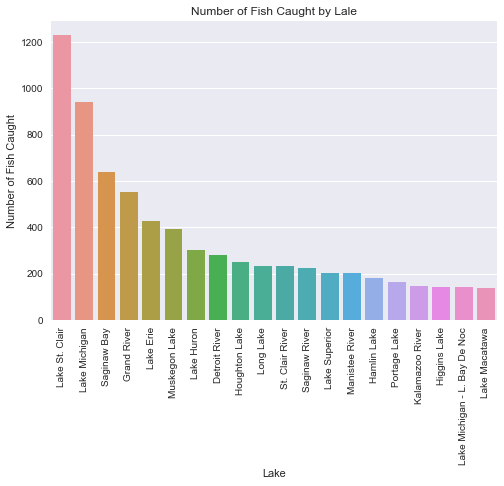

In [238]:
sns.barplot(x = 'Waterbody', y = 'Counts', data = fish_by_lake_top_twenty)
plt.title('Number of Fish Caught by Lale')
plt.ylabel('Number of Fish Caught')
plt.xlabel('Lake')
plt.xticks(rotation = 90)
plt.show()

In [239]:
# Inspect number of fish caught per species

fish_by_species = df.groupby('Species').Species.count()
fish_by_species = pd.DataFrame(fish_by_species)
fish_by_species.columns = ['Counts']
fish_by_species.reset_index(inplace = True)
fish_by_species.sort_values('Counts', ascending= False, inplace = True)
fish_by_species.head()

,Species,Counts
6,BLUEGILL,1374
19,FRESHWATER DRUM,1314
43,SMALLMOUTH BASS,1189
41,ROCK BASS,1186
13,CHANNEL CATFISH,960


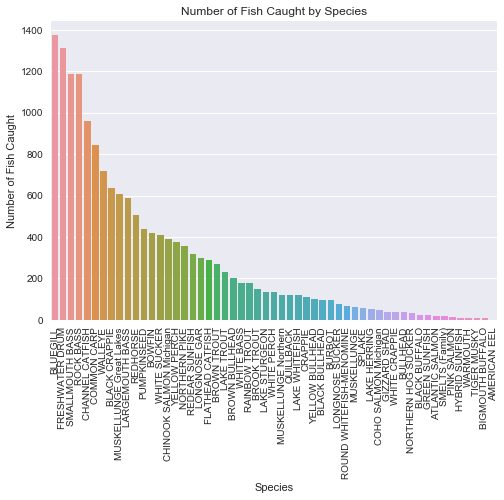

In [240]:
sns.barplot(x = 'Species', y = 'Counts', data = fish_by_species)
plt.title('Number of Fish Caught by Species')
plt.ylabel('Number of Fish Caught')
plt.xlabel('Species')
plt.xticks(rotation = 90)
plt.show()

### In progress...

In [335]:
length_by_year.Year = length_by_year.Year.astype('int')

In [343]:
length_by_year = df.loc[:,['Year', 'Length (in)']]

length_by_year.sort_values('Year', inplace = True)

length_by_year.columns = ['Year', 'Length']

In [347]:
length_by_year_rolling = length_by_year.groupby('Year').Length.mean()

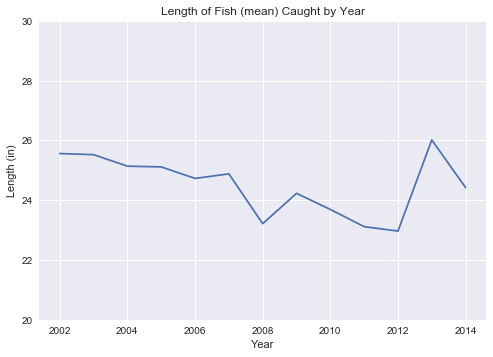

In [361]:
plt.plot(length_by_year_rolling)
plt.ylim(20,30)
plt.title('Length of Fish (mean) Caught by Year')
plt.ylabel('Length (in)')
plt.xlabel('Year')
plt.show()